# 'open-visualizations' for repeated measures in Python - #1

*Jordy van Langen*    
*jordy.vanlangen@sydney.edu.au*   
*19-03-2020* 

## Background

This tutorial is a follow up on my ['Open-visualizations tutorial for repeated measures in R'](https://github.com/jorvlan/open-visualizations/tree/master/R) and contributes to a GitHub repository called ['open-visualizations'](https://github.com/jorvlan/open-visualizations). 

Next to this notebook, I have also created another tutorial in Python with a slightly different approach which does not include R-like behavior. See ['open-visualizations'](https://github.com/jorvlan/open-visualizations) to view that tutorial. 


If you have any questions, or suggestions for improvement, please open an issue in the GitHub repository [open-visualizations](https://github.com/jorvlan/open-visualizations). 

If you use my repository for your research, please reference it.




## Load libraries

In [1]:
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Note

- If `plotnine` is not included in your environment (e.g, Anaconda), you can read about how to install it here:  https://github.com/conda-forge/plotnine-feedstock

## Activate folder where figures are stored

- By default, figures will not be saved. If you want to save figures, set savefig to `True`.

In [1]:
savefig = False

if savefig:
    
    #Load libraries
    import os
    from os.path import isdir
    
    #Get current working directory, but you can specify your own directory of course.
    cwd = os.getcwd()
    
    if  os.path.exists(cwd + "/repmes_tutorial_1_python/figs"):
        print("Directory already exists")

        #Assign the existing directory to a variable
        fig_dir = cwd + "/repmes_tutorial_1_python/figs"
        
    elif not os.path.exists(cwd + "/repmes_tutorial_1_python/figs"):
        print("Directory does not exist and will be created ......")
        os.makedirs(cwd + "/repmes_tutorial_1_python/figs")
        
        if isdir(cwd + "/repmes_tutorial_1_python/figs"):
            print('Directory was created succesfully')
        
        #Assign the created directory to a variable
        fig_dir = cwd + "/repmes_tutorial_1_python/figs" 
   
    else:
        print("Something went wrong")

## Load the data

- For this tutorial we make use of the `iris` dataset which we can access in two ways.
   

In [3]:
# Directly from URL

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
iris_df = pd.read_csv(url)
iris_df

# Locally

#path = "/Users/jordyvanlangen/Downloads/iris.csv"

#iris_df = pd.read_csv(path)
#iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Manipulate the data
- The original iris dataset will be manipulated in the same way as in the [R tutorial](https://github.com/jorvlan/open-visualizations/blob/master/R/repmes_tutorial_R.pdf).

In [4]:
# Create two variables and create a variable n 
before = iris_df['sepal_length'].iloc[0:50]
after = iris_df['sepal_length'].iloc[50:100]
n = len(before)

# Create variable x indicating the conditions
x = np.array([1, 2])
x = np.repeat(x, [n, n])
x = pd.DataFrame(x, columns = ['x'])

# Create variable y containing the values
y_array = np.array([before, after])

y1_50_df = pd.DataFrame(y_array[0], columns = ['y'])
y51_100_df = pd.DataFrame(y_array[1], columns = ['y'])

frames = [y1_50_df, y51_100_df]
y = pd.concat((frames), ignore_index = True)

# Define the grouping variable 'id'  
s1 = pd.Series(range(1,51), dtype="category")
s2 = pd.Series(range(1,51), dtype="category")
s1_s2 = pd.concat([s1, s2], ignore_index = True)

id_df = pd.DataFrame(s1_s2, columns = ['id'])

# Merge the dataframes together 
d = pd.concat([y,x,id_df], axis=1)

pd.options.display.float_format = '{:.3f}'.format
print("The manipulated dataframe with 3 columns ")
print(d[['y', 'x', 'id']])

The manipulated dataframe with 3 columns 
       y  x  id
0  5.100  1   1
1  4.900  1   2
2  4.700  1   3
3  4.600  1   4
4  5.000  1   5
..   ... ..  ..
95 5.700  2  46
96 5.700  2  47
97 6.200  2  48
98 5.100  2  49
99 5.700  2  50

[100 rows x 3 columns]


## Figure 1

In [5]:
# ------ Define pre-settings  ------ #
w = 6
h = 6
labels = ['Before', 'After']

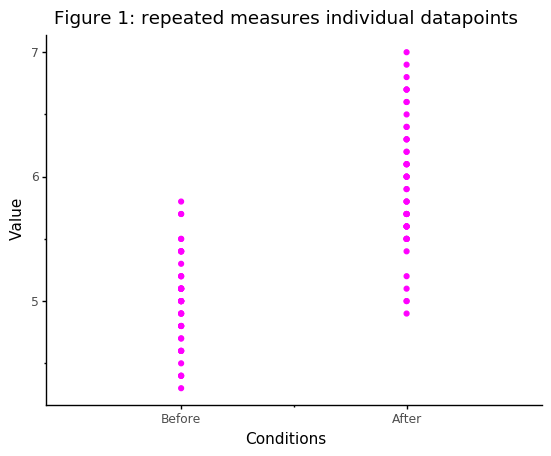

<ggplot: (7547757309)>

In [6]:
# Plot figure 
fig1 = (
    ggplot(d) 
    + geom_point(aes(x='x', y = 'y'), color = 'magenta') 
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, name = 'Conditions', limits = (0.5,2.5))
    + ylab('Value')
    + ggtitle('Figure 1: repeated measures individual datapoints')

)

# Save figure 
if savefig:
    fig1.save(fig_dir + "/figure1.png", width = w, height = h, verbose = False)
    
# Show figure
fig1

### Note

- `verbose =` needs to be specified, because if `True` (default), `plotnine` will throw a warning. 
- See https://github.com/has2k1/plotnine/blob/83ceee3b08a8e12b286479b021e85b64fc8eb40d/plotnine/ggplot.py for more information.

## Figure 2

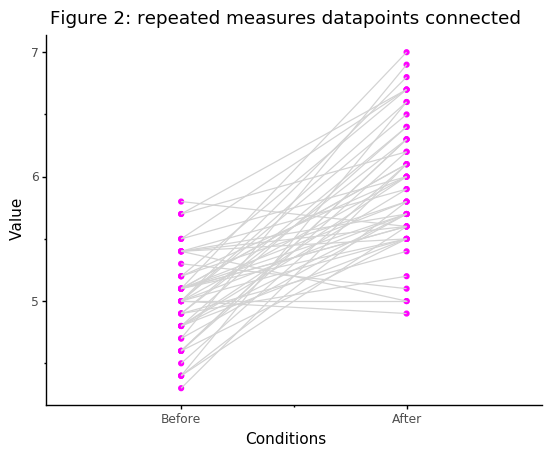

<ggplot: (-9223372029305822734)>

In [7]:
# Plot figure 
fig2 = (
    ggplot(d) 
    + geom_point(aes(x='x', y = 'y'), color = 'magenta') 
    + geom_line(aes(x='x', y = 'y', group='id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, name = 'Conditions', limits = (0.5,2.5))
    + ylab('Value')
    + ggtitle('Figure 2: repeated measures datapoints connected')
)

# Save figure
if savefig:
    fig2.save(fig_dir + "/figure2.png", width = w, height = h, verbose = False)
    
# Show figure
fig2

## Figure 3

First we have to create a new variable that contains jitter along the x-axis.

In [8]:
# Create two variables indicating jitter 
np.random.seed(321)
xj = np.random.normal(1, 0.05, len(d['x'].iloc[0:50]))

np.random.seed(321)
xj_2 = np.random.normal(2, 0.05, len(d['x'].iloc[0:50]))

In [9]:
# Create two dataframes of those variables an put them together 
xj_df = pd.DataFrame(xj, columns = ['xj'])
xj_2_df = pd.DataFrame(xj_2, columns = ['xj'])

frames_jit = [xj_df, xj_2_df]

# Use the concat function to concatenate them 
jit_df = pd.concat((frames_jit), ignore_index = True)

In [10]:
# Merge the jitter dataframes with the other existing dataframes 
d = pd.concat([y,x,id_df,jit_df], axis=1)

pd.options.display.float_format = '{:.3f}'.format
print("The manipulated dataframe with 4 columns including jitter ")
print(d[['y', 'x', 'id','xj']])

The manipulated dataframe with 4 columns including jitter 
       y  x  id    xj
0  5.100  1   1 1.009
1  4.900  1   2 1.082
2  4.700  1   3 1.002
3  4.600  1   4 0.956
4  5.000  1   5 0.943
..   ... ..  ..   ...
95 5.700  2  46 2.011
96 5.700  2  47 2.013
97 6.200  2  48 1.930
98 5.100  2  49 2.010
99 5.700  2  50 1.988

[100 rows x 4 columns]


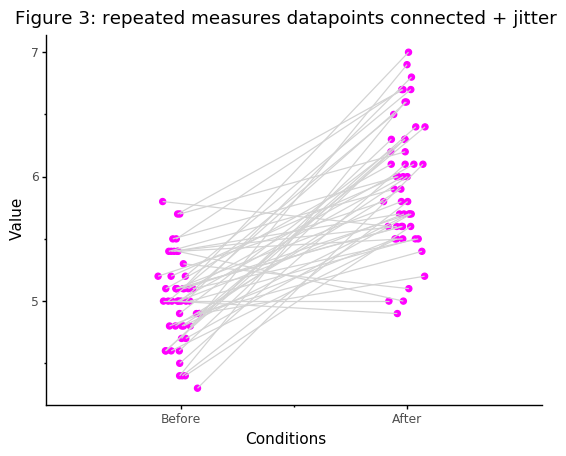

<ggplot: (7549264893)>

In [11]:
# Plot figure 
fig3 = (
    ggplot(d) 
    + geom_point(aes(x='xj', y = 'y'), color = 'magenta', size = 2) 
    + geom_line(aes(x='xj', y = 'y', group='id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, name = 'Conditions', limits = (0.5,2.5))
    + ylab('Value')
    + ggtitle('Figure 3: repeated measures datapoints connected + jitter')
)

# Save figure
if savefig:
    fig3.save(fig_dir + "/figure3.png", width = w, height = h, verbose = False)
    
# Show figure
fig3

## Figure 4

Let's color the variables according to their group: 'Before' and 'After.

**Note**:    
Alternatively, you could also use one `geom_point` and color the data within the `aes` call, instead of using an extra line of code of `geom_point`. The downside of that approach is that you're less flexible in e.g., controlling the color of your `geom` objects.

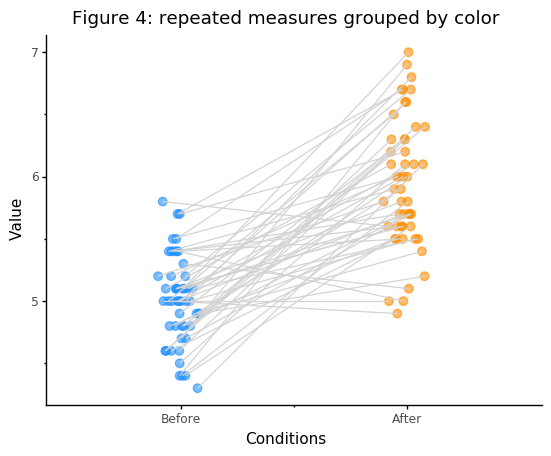

<ggplot: (7549795027)>

In [13]:
# Plot figure 
fig4 = (
    ggplot(d)
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 3)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 3)
    + geom_line(aes(x='xj', y = 'y', group = 'id'), color = 'lightgray')
    + theme_classic()
    + scale_x_continuous(breaks=(1, 2), labels = labels, name = 'Conditions', limits = (0.5,2.5))
    + ylab('Value')
    + ggtitle('Figure 4: repeated measures grouped by color')
)

# Save figure
if savefig:
    fig4.save(fig_dir + "/figure4.png", width = w, height = h, verbose = False)
    
# Show figure
fig4

## Figure 5

Let's try to see whether we can add boxplots.

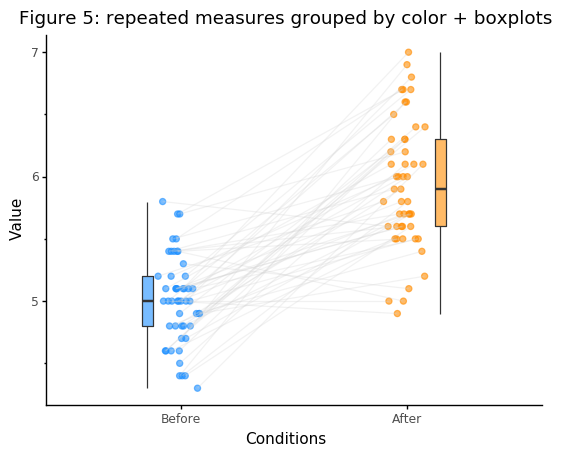

<ggplot: (-9223372029304737518)>

In [14]:
# Plot figure 
fig5 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .3)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.15),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.15),width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 5: repeated measures grouped by color + boxplots')
)

# Save figure
if savefig:
    fig5.save(fig_dir + "/figure5.png", width = w, height = h, verbose = False)
    
# Show figure
fig5

## Figure 6

Let's see whether we can add violins. Currently, `plotnine` does not support the R package `gghalves`, therefore it is - to the best of my knowledge - not possible to create the `half_violins` as done in R. I've opened an Issue on the GitHub page to see whether it is possible to add the `half_geoms` in the future release of `plotnine`. 

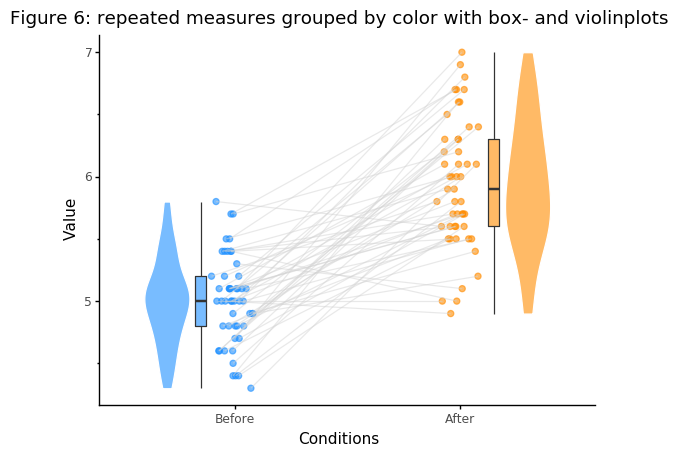

<ggplot: (-9223372029304995598)>

In [15]:
# Plot figure 
fig6 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.15),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.15),width = .05, alpha = .6)
    + geom_violin(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.3), width = .2, alpha = .6)
    + geom_violin(d.iloc[50:100,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'darkorange', show_legend=False, position = position_nudge(x=.3), width = .2, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 6: repeated measures grouped by color with box- and violinplots')

)

# Save figure
if savefig:
    fig6.save(fig_dir + "/figure6.png", width = w, height = h, verbose = False)
    
# Show figure
fig6

## Figure 7

Lets try to add means and ci's in the figure.

In [16]:
# Load scipy.stats 
import scipy.stats as st

In [17]:
# Calculate some basic statistics 
score_mean_1 = np.mean(d['y'].iloc[0:50])
score_mean_2 = np.mean(d['y'].iloc[50:100])

score_median_1 = np.median(d['y'].iloc[0:50])
score_median_2 = np.median(d['y'].iloc[50:100])

score_std_1 = np.std(d['y'].iloc[1:50])
score_std_2 = np.std(d['y'].iloc[50:100])

score_se_1 = score_std_1/np.sqrt(50) #adjust your n
score_se_2 = score_std_2/np.sqrt(50) #adjust your n

score_ci_1 = st.t.interval(0.95, len(d['y'].iloc[0:50])-1, loc=score_mean_1, scale=st.sem(d['y'].iloc[0:50]))
score_ci_2 = st.t.interval(0.95, len(d['y'].iloc[50:100])-1, loc=score_mean_2, scale=st.sem(d['y'].iloc[50:100]))


# Create dataframe with these variables 
summary_df = pd.DataFrame({'group': ["x", "z"],
                           'N': [50, 50],
                           'score_mean': [score_mean_1, score_mean_2],
                           'score_median': [score_median_1, score_median_2],
                           'score_std': [score_std_1, score_std_2],
                           'score_se': [score_se_1, score_se_2],
                           'score_ci': [score_ci_1[1]-score_ci_1[0], score_ci_2[1]-score_ci_2[0]]                          
                          })
summary_df

,group,N,score_mean,score_median,score_std,score_se,score_ci
0,x,50,5.006,5.000,0.352,0.050,0.200
1,z,50,5.936,5.900,0.511,0.072,0.293


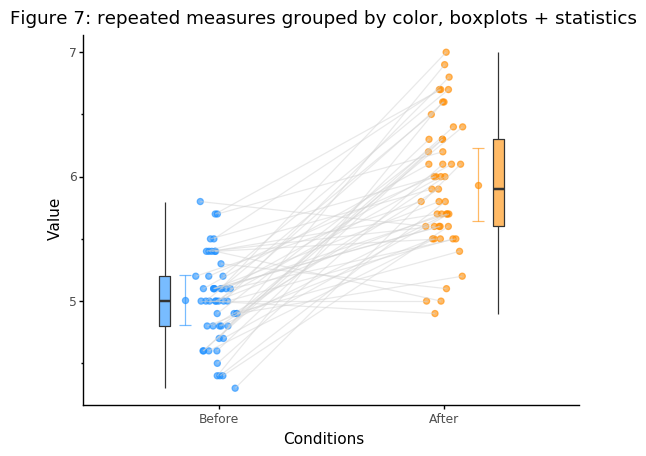

<ggplot: (7549755105)>

In [18]:
# Plot figure 
fig7 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.24),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.24),width = .05, alpha = .6)
    + geom_point(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2]), color = 'dodgerblue', show_legend = False, position = position_nudge(x = -.15), alpha = .6, size = 2)
    + geom_point(summary_df.iloc[1:2,:],aes(x = 2, y = summary_df.iloc[1,2]), color = 'darkorange', show_legend = False, position = position_nudge(x = .15), alpha = .6, size = 2)
    + geom_errorbar(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2], ymin = summary_df.iloc[0,2]-summary_df.iloc[0,6], 
                                              ymax = summary_df.iloc[0,2]+summary_df.iloc[0,6]), color = 'dodgerblue', show_legend = False, position = position_nudge(-.15), width = .05, alpha = .6)
    + geom_errorbar(summary_df.iloc[1:2,:], aes(x = 2, y = summary_df.iloc[1,2], ymin = summary_df.iloc[1,2]-summary_df.iloc[1,6],
                                            ymax = summary_df.iloc[1,2]+summary_df.iloc[1,6]), color = 'darkorange', show_legend = False, position = position_nudge(.15), width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 7: repeated measures grouped by color, boxplots + statistics')
)

# Save figure
if savefig:
    fig7.save(fig_dir + "/figure7.png", width = w, height = h, verbose = False)
    
# Show figure
fig7

## Figure 8

We can try to add a line connecting the means.

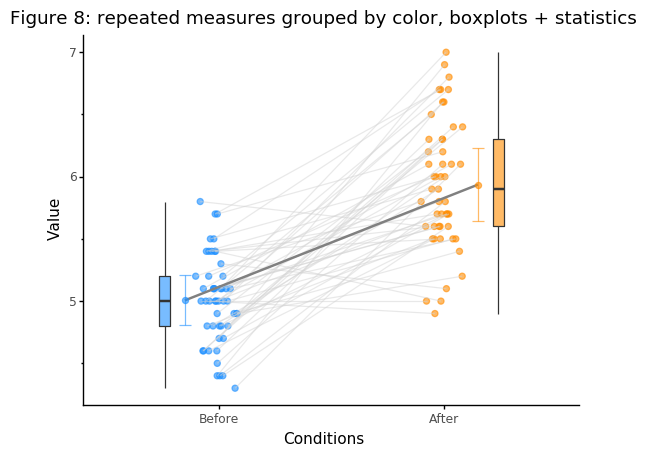

<ggplot: (-9223372029305769735)>

In [19]:
# Define the x-axis location of both means, 
# which in this case is: 1 & 'position_nudge(-.15)' = .85 and 2 & position_nudge(.15) = 2.15
x_tick_means = [0.85,2.15]

# Plot figure 
fig8 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='xj', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='xj', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='xj', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_line(summary_df,aes(x = x_tick_means, y = 'score_mean'), color = 'gray', size = 1)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.24),width = .05, alpha = .6)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), fill = 'darkorange', show_legend=False, position = position_nudge(x=0.24),width = .05, alpha = .6)
    + geom_point(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2]), color = 'dodgerblue', show_legend = False, position = position_nudge(x = -.15), alpha = .6, size = 2)
    + geom_point(summary_df.iloc[1:2,:],aes(x = 2, y = summary_df.iloc[1,2]), color = 'darkorange', show_legend = False, position = position_nudge(x = .15), alpha = .6, size = 2)
    + geom_errorbar(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2], ymin = summary_df.iloc[0,2]-summary_df.iloc[0,6], 
                                              ymax = summary_df.iloc[0,2]+summary_df.iloc[0,6]), color = 'dodgerblue', show_legend = False, position = position_nudge(-.15), width = .05, alpha = .6)
    + geom_errorbar(summary_df.iloc[1:2,:], aes(x = 2, y = summary_df.iloc[1,2], ymin = summary_df.iloc[1,2]-summary_df.iloc[1,6],
                                            ymax = summary_df.iloc[1,2]+summary_df.iloc[1,6]), color = 'darkorange', show_legend = False, position = position_nudge(.15), width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 8: repeated measures grouped by color, boxplots + statistics')
)

# Save figure
if savefig:
    fig8.save(fig_dir + "/figure8.png", width = w, height = h, verbose = False)
    
# Show figure
fig8

## Figure 9

- Lets's try to add it all together.  
- I have been playing around with colors and styles.


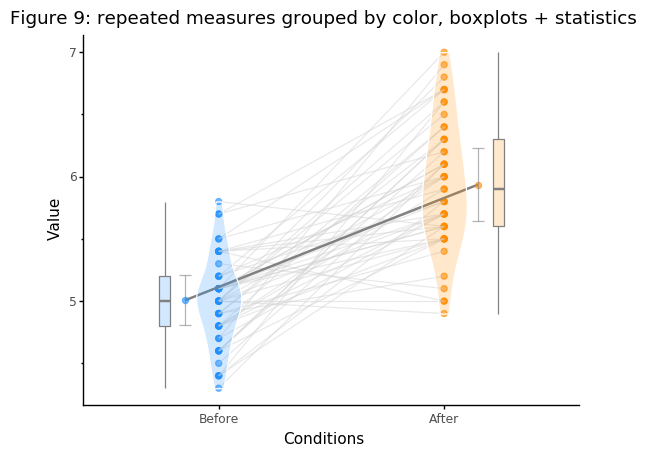

<ggplot: (-9223372029305168447)>

In [21]:
# Plot figure 
fig9 = (
    ggplot()
    + geom_point(d.iloc[:50,:],aes(x='x', y = 'y'), color = 'dodgerblue', show_legend=False, alpha = .6, size = 2)
    + geom_point(d.iloc[50:100,:],aes(x='x', y = 'y'), color = 'darkorange', show_legend=False, alpha = .6, size = 2)
    + geom_line(d,aes(x='x', y = 'y', group = 'id'), color = 'lightgray', alpha = .5)
    + geom_line(summary_df,aes(x = x_tick_means, y = 'score_mean'), color = 'gray', size = 1)
    + geom_boxplot(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), color = 'gray', fill = 'dodgerblue', show_legend=False, position = position_nudge(x=-.24),width = .05, alpha = .2)
    + geom_boxplot(d.iloc[50:100,:], aes(x='factor(x)', y = 'y'), color = 'gray', fill = 'darkorange', show_legend=False, position = position_nudge(x=0.24),width = .05, alpha = .2)
    + geom_violin(d.iloc[:50,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'dodgerblue', show_legend=False, position = position_nudge(x=0), width = .2, alpha = .2)
    + geom_violin(d.iloc[50:100,:],aes(x='factor(x)', y = 'y'), color = 'white', fill = 'darkorange', show_legend=False, position = position_nudge(x=0), width = .2, alpha = .2)
    + geom_point(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2]), color = 'dodgerblue', show_legend = False, position = position_nudge(x = -.15), alpha = .6, size = 2)
    + geom_point(summary_df.iloc[1:2,:],aes(x = 2, y = summary_df.iloc[1,2]), color = 'darkorange', show_legend = False, position = position_nudge(x = .15), alpha = .6, size = 2)
    + geom_errorbar(summary_df.iloc[:1,:],aes(x = 1, y = summary_df.iloc[0,2], ymin = summary_df.iloc[0,2]-summary_df.iloc[0,6], 
                                              ymax = summary_df.iloc[0,2]+summary_df.iloc[0,6]), color = 'gray', show_legend = False, position = position_nudge(-.15), width = .05, alpha = .6)
    + geom_errorbar(summary_df.iloc[1:2,:], aes(x = 2, y = summary_df.iloc[1,2], ymin = summary_df.iloc[1,2]-summary_df.iloc[1,6],
                                            ymax = summary_df.iloc[1,2]+summary_df.iloc[1,6]), color = 'gray', show_legend = False, position = position_nudge(.15), width = .05, alpha = .6)
    + theme_classic()
    + scale_x_discrete(labels=labels, name='Conditions')
    + ylab('Value')
    + ggtitle('Figure 9: repeated measures grouped by color, boxplots + statistics')
)

# Save figure
if savefig:
    fig9.save(fig_dir + "/figure9.png", width = w, height = h, verbose = False)
    
# Show figure
fig9

## General remarks / tips

- If you want to save your figures in a high-quality manner for e.g., publications, you could save your figure with a `.tif` extension and add `dpi=` as used in the following line of code:

- To save with `plotnine`: 

    `fig.save("/figure.tif", width = w, height = h, verbose = False, dpi = 600)`


- To save with `matplotlib`:

    `plt.savefig("/figure.tif", width = w, height = h, dpi = 600)`


## That's it! (for now)

You have reached the end of this document.

I hope you'll be able to use this tutorial to create more `open-visualizations` for your research!

If you use this tutorial, please cite it in your work (see DOI above).


[open-visualizations](https://github.com/jorvlan/open-visualizations) for repeated measures in `R` and `Python` by [**Jordy van Langen**](https://jordyvanlangen.com)

